In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn import datasets

In [4]:
###Import Boston Housing Dataset and Target Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
dh = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
data = np.hstack([dh.values[::2, :], dh.values[1::2, :2]])
target = dh.values[1::2, 2]

##['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [5]:
###Clean dataset
#Correct for extra rows in wrong columns
for i in range(0,1012,1):
    if i%2 == 1:
        dh.loc[i-1]['B'] = dh.loc[i]['CRIM']
        dh.loc[i-1]['LSTAT'] = dh.loc[i]['ZN']
        dh.loc[i-1]['MEDV'] = dh.loc[i]['INDUS']


In [6]:
###Delete extra rows (odd numbered rows)
for i in range(0,1012,1):
    if i%2 == 1:
        dh.drop(axis = 0, labels = i, inplace=True)

In [7]:
###Reset Index
dh.reset_index(drop = True, inplace = True)

In [8]:
##Set price column
dh['price'] = target

In [9]:
###Explore the dataset
dh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [10]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  price    506 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


In [11]:
dh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


Text(0, 0.5, 'count')

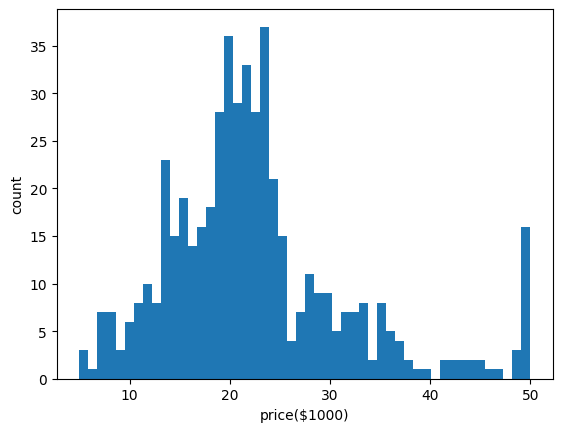

In [12]:
###Plot the price distribution in a histogram
plt.hist(dh['price'],bins = 50)
plt.xlabel('price($1000)')
plt.ylabel('count')


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


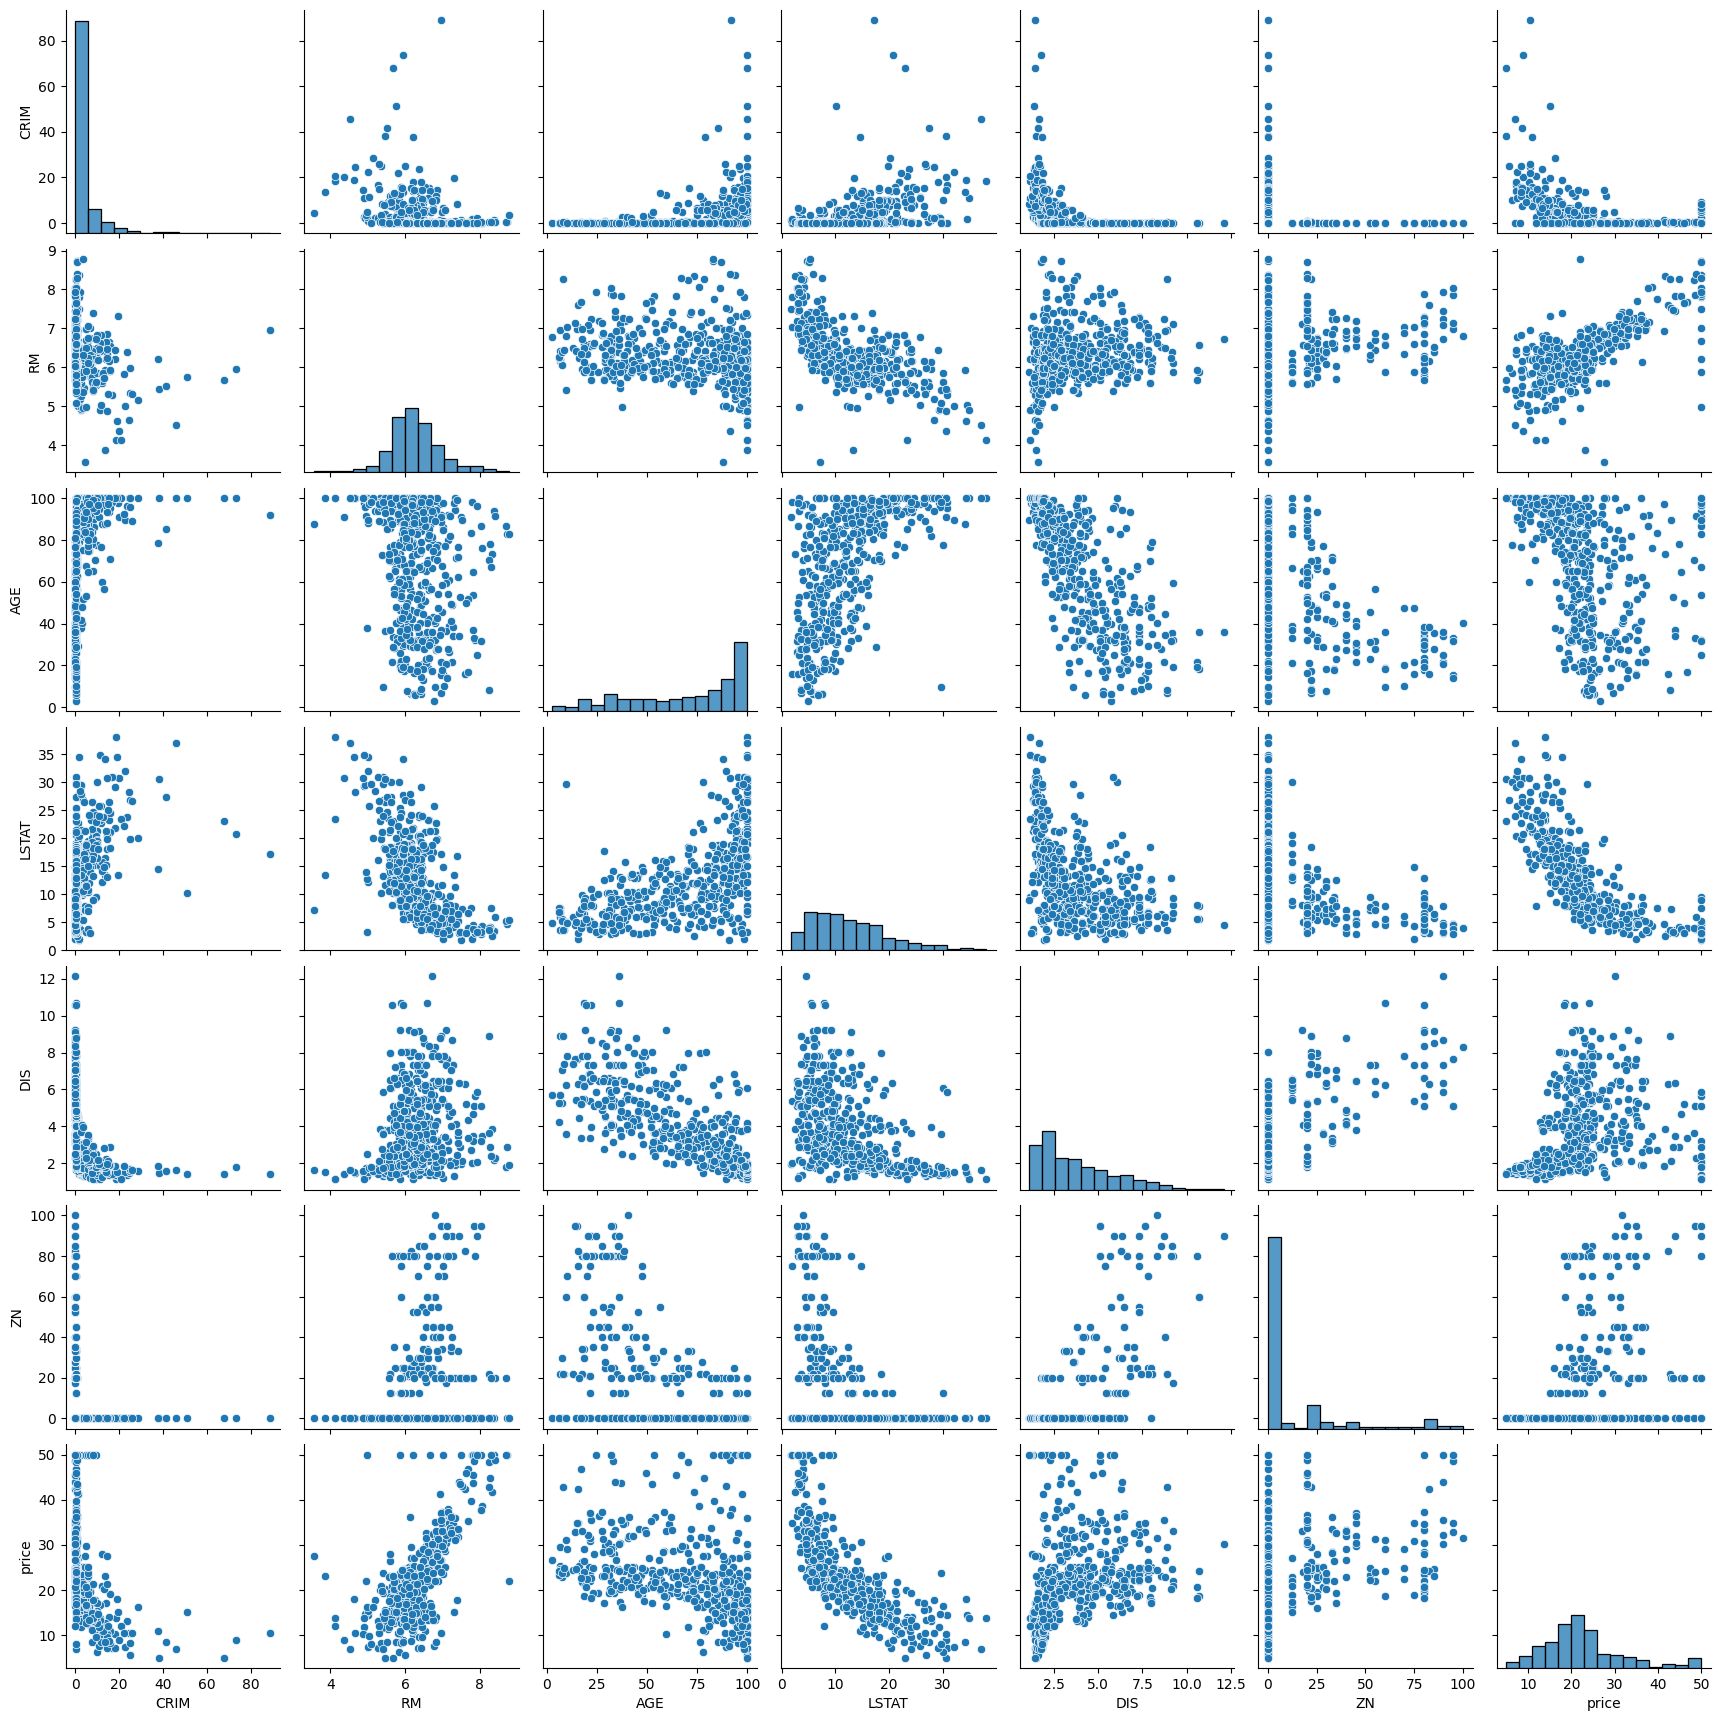

In [ ]:
##Create a pairplot of selected datapoints to get their correlations
sns.pairplot(data = dh[['CRIM', 'RM', 'AGE', 'LSTAT', 'DIS', 'ZN', 'price']], diag_kws={'bins':15})

<Axes: >

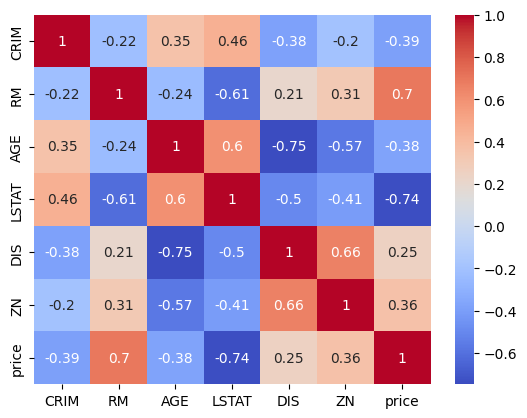

In [14]:
###Our aim here is to create a model that will suggest the price of the house (y) based on other parameters (X)
###From the data, the datapoints with the highest correlation to price are as selected ('CRIM', 'RM', 'AGE', 'LSTAT', 'DIS', 'ZN').
##Therefore, they will serve as our X
sns.heatmap(data = dh[['CRIM', 'RM', 'AGE', 'LSTAT', 'DIS', 'ZN', 'price']].corr(), annot=True, cmap = 'coolwarm')

In [15]:
##Create your X and y datasets
X = dh[['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS']]
y = dh['price']

In [16]:
X.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
0,18.0,0.00632,6.575,65.2,4.98,4.0900
1,0.0,0.02731,6.421,78.9,9.14,4.9671
2,0.0,0.02729,7.185,61.1,4.03,4.9671
3,0.0,0.03237,6.998,45.8,2.94,6.0622
4,0.0,0.06905,7.147,54.2,5.33,6.0622


In [17]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [18]:
###Split the X and y datasets into train and test using sklearn
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.33,
    random_state=42)

In [20]:
X_train.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
478,0.0,10.23300,6.185,96.7,18.03,2.1705
26,0.0,0.67191,5.813,90.3,14.81,4.6820
7,12.5,0.14455,6.172,96.1,19.15,5.9505
492,0.0,0.11132,5.983,83.5,13.35,2.1099
108,0.0,0.12802,6.474,97.1,12.27,2.4329


In [21]:
X_test.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
173,0.0,0.09178,6.416,84.1,9.04,2.6463
274,40.0,0.05644,6.758,32.9,3.53,4.0776
491,0.0,0.10574,5.983,98.8,18.07,1.8681
72,0.0,0.09164,6.065,7.8,5.52,5.2873
452,0.0,5.09017,6.297,91.8,17.27,2.3682


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 173 to 262
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZN      167 non-null    float64
 1   CRIM    167 non-null    float64
 2   RM      167 non-null    float64
 3   AGE     167 non-null    float64
 4   LSTAT   167 non-null    float64
 5   DIS     167 non-null    float64
dtypes: float64(6)
memory usage: 9.1 KB


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 478 to 102
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZN      339 non-null    float64
 1   CRIM    339 non-null    float64
 2   RM      339 non-null    float64
 3   AGE     339 non-null    float64
 4   LSTAT   339 non-null    float64
 5   DIS     339 non-null    float64
dtypes: float64(6)
memory usage: 18.5 KB


In [25]:
##Create and train model using linear regression model
from sklearn import linear_model

In [26]:
lm = linear_model.LinearRegression()

In [27]:
#We want to fit the train dataset with the linear regression
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
###Evaluate the model
##Check the intercept (the mean value of y when all X = 0)
lm.intercept_

8.905286971987962

In [29]:
###Coefficients
##Coefficients are the impact of varying one of the X variables (while keeping all other X variables constant) on the y variable
##It is the effect on a unit change of an X variable on y when all other X variables are kept constant
##Check the coefficients
lm.coef_

array([ 0.05834141, -0.17564927,  4.53727272, -0.02529785, -0.66556685,
       -1.24284723])

In [32]:
##Create your coefficients dataframe
coeff = pd.DataFrame(data = lm.coef_, index = X.columns, columns = ['Coefficients'])

In [33]:
coeff

,Coefficients
ZN,0.058341
CRIM,-0.175649
RM,4.537273
AGE,-0.025298
LSTAT,-0.665567
DIS,-1.242847


In [34]:
###Having trained our model, we need to get the predictions and compare with our test dataset
pred = lm.predict(X_test)

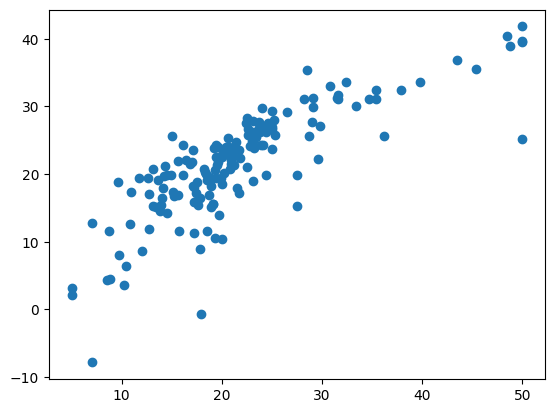

In [35]:
###Compare using a scatter plot
plt.scatter(y_test, pred)

/var/folders/b6/l1n962ss59n521_0vxpckrcr0000gn/T/ipykernel_50870/3363427752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


<Axes: xlabel='price', ylabel='Density'>

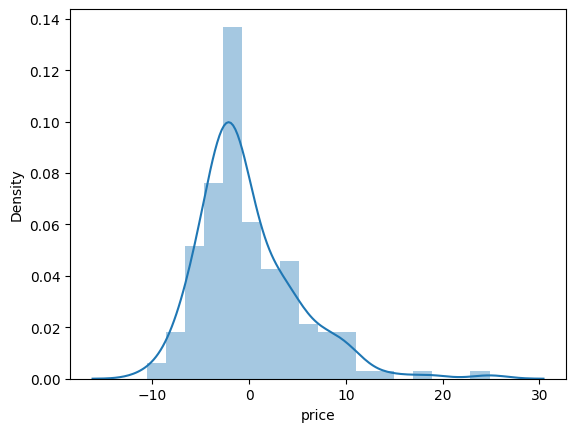

In [36]:
##Compare using a histogram of the residual values (y_test - pred)
sns.distplot(y_test-pred)

In [37]:
###Regression Evaluation Metrics
##This is the measure of accuracy of your regression model
##MAE - Mean Absolute Error = sum(abs(y_test - pred))/n - absolute errors
##MSE - Mean Squared Error = sum((y_test - pred)^2)/n - punishes larger errors
##RMSE - Root Mean Square Error = (sum((y_test - pred)^2)/n)^0.5 - frequently used, standard deviation

In [38]:
from sklearn import metrics

In [39]:
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  3.8723125587512723
MSE:  26.59837171600332
RMSE:  5.157360925512516
